In [1]:
!pip install opencv-python

# [IAPR][iapr]: Lab 2 ‒  Object description


**Group ID:** 14

**Author 1 (sciper):** Emna Tourki (288580)  
**Author 2 (sciper):** Yu-Hsin Yang (334949)   
**Author 3 (sciper):** Tabea Steinbrinker (350566)     

**Release date:** 25.03.2022  
**Due date:** 08.04.2022 (11:59 pm)


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as
preparation for the final project, which is a practical project which ties together the topics of the course.

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external
functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation
in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook <font color='red'> rerun </font>the notebook from scratch !**
`Kernel` > `Restart & Run All`

We will not rerun the notebook for you.


[iapr]: https://github.com/LTS5/iapr

## 0. Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [189]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
data_part1 = os.path.join(data_base_path, data_folder, 'part1')
data_part2 = os.path.join(data_base_path, data_folder, 'part2')

tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

---
## Part 1
In the `lab-02-data/part1` folder, you will find 28x28 grey-scale pictures of handwritten "0" and "1".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

Your goal is to extract, from each of those images, a 2-dimensional feature vector (i.e. 2 features) and to plot them all on a 2D graph.
If you have chosen good features, the vectors of the "0"'s should nicely cluster in one part of the plane and those of the "1"'s in another.

Please try:
1. Fourier Descriptors (15pts). 
    1. Implementation (10 pts).
    2. Showing invariance to rotation, translation and scaling (5 pts).
2. Additional method of your choice (5 pts)


**Note:** for the Fourier descriptors, the u_k signal has to be constructed by following the contour point after point. Some pre-processing (image binarization, possibly some Mathematical Morphology) might be useful.

### 1.1 Data visualization

In [3]:
import skimage.morphology as morphology
from skimage import measure
import numpy as np
import cv2

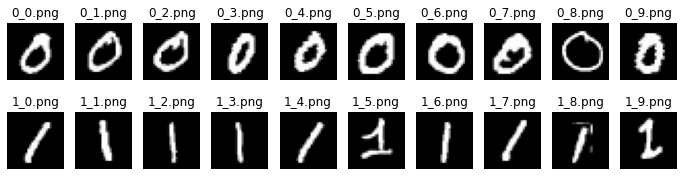

In [4]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

def load(path, digit='0'):
    digit_path = os.path.join(path, digit)
    digit_names = [nm for nm in os.listdir(digit_path) if '.png' in nm]  # make sure to only load .png
    digit_names.sort()  # sort file names
    ic = skimage.io.imread_collection([os.path.join(digit_path, nm) for nm in digit_names])
    digit_im = skimage.io.concatenate_images(ic)
    return digit_im, digit_names
                        
#  Load zeros and ones
zeros_im, zeros_names = load(data_part1, digit='0')
ones_im, ones_names = load(data_part1, digit='1')


# Plot images
fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

In [5]:
def display_images(zeros_im,zeros_names,ones_im,ones_names, zeros_contours = None, ones_contours = None):
    if zeros_contours == None:
        fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
        for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
            ax.imshow(im, cmap='gray')
            ax.axis('off')
            ax.set_title(nm)
        for ax, im, nm in zip(axes[1], ones_im, ones_names):
            ax.imshow(im, cmap='gray')
            ax.axis('off')
            ax.set_title(nm)
      
    else:
        fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
        for ax, im, nm,i in zip(axes[0], zeros_im_bin_op, zeros_names,range(10)):
            for contour in zeros_contours[i]:
                ax.plot(contour[:, 1], contour[:, 0], linewidth=2,label = {i})
            ax.imshow(im, cmap='gray')
            ax.axis('off')
            ax.set_title(nm)
        for ax, im, nm,i in zip(axes[1], ones_im_bin_op, ones_names,range(10)):
            for contour in ones_contours[i]:
                ax.plot(contour[:, 1], contour[:, 0], linewidth=2,label = {i})    
            ax.imshow(im, cmap='gray')
            ax.axis('off')
            ax.set_title(nm)

### Pre-processing the images

In [6]:
#Turning the images in binary

zeros_im_bin = np.zeros(zeros_im.shape)
ones_im_bin = np.zeros(ones_im.shape)

for i in range(10):
    _, zeros_im_bin[i] = cv2.threshold(zeros_im[i], 127, 255, cv2.THRESH_BINARY)
    _, ones_im_bin[i] = cv2.threshold(ones_im[i],127,255,cv2.THRESH_BINARY)

#display_images(zeros_im_bin,zeros_names,ones_im_bin,ones_names)

In [7]:
#By dilating the images first, we make the zeors and ones a little bit fatter.
#If we open it then, some other small bumps are being removed

zeros_im_bin_op = np.zeros(zeros_im.shape)
ones_im_bin_op = np.zeros(ones_im.shape)

kernel1 = np.array([[1,1],[0,1]])

for i in range(10):
    zeros_im_bin_op[i] = morphology.binary_dilation(zeros_im_bin[i], kernel1)
    ones_im_bin_op[i] = morphology.binary_dilation(ones_im_bin[i], kernel1)
    zeros_im_bin_op[i] = morphology.binary_opening(zeros_im_bin_op[i], kernel1)
    ones_im_bin_op[i] = morphology.binary_opening(ones_im_bin_op[i], kernel1)
    #zeros_im_bin_op[i] = morphology.skeletonize(zeros_im_bin_op[i])
    #ones_im_bin_op[i] = morphology.skeletonize(ones_im_bin_op[i])

#display_images(zeros_im_bin_op,zeros_names,ones_im_bin_op,ones_names)

### 1.2 Fourier descriptors (15 pts)

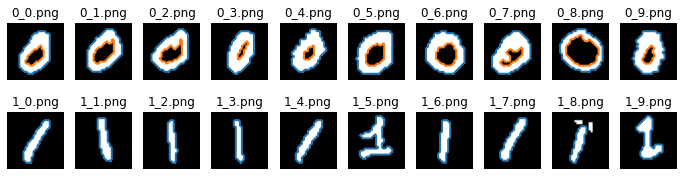

In [8]:
# Add your implementation and discussion

#Find the contours and delete the ones, that are shorter than a threshhold, since they should not be relevant

zeros_contours = [measure.find_contours(zeros_im_bin_op[i],0.5) for i in range(10)]
ones_contours = [measure.find_contours(ones_im_bin_op[i],0.5) for i in range(10)]
thresh = 20

for i in range(10):
    #print('i = ',i,)
    #print(len(ones_contours[i]))
    save = []
    for j, contour in enumerate(ones_contours[i]):
        if len(contour) > thresh:
            save.append(j)
    ones_contours[i] = [ones_contours[i][j] for j in save]
    
    save = []
    for j, contour in enumerate(zeros_contours[i]):
        if len(contour) > thresh:
            save.append(j)
    zeros_contours[i] = [zeros_contours[i][j] for j in save]
    
display_images(zeros_im_bin_op,zeros_names,ones_im_bin_op,ones_names, zeros_contours = zeros_contours, ones_contours = ones_contours)

In [11]:
#for one image

In [12]:
from functools import reduce
def findContour(image):
    contours = measure.find_contours(image,0.5)
    thresh = 20
    
    save = []
    res_contours = []
    for i, con in enumerate(contours):
        if len(con) > thresh:
            save.append([tuple(c) for c in con])
            #res_contours.append()
    res_contours = reduce(lambda x,y :x+y ,save)
    
    return res_contours

In [13]:
def findImageDescriptor(contour):
    contour = np.array(contour)
    """ findImageDescriptor(img) finds and returns the
    Fourier-Descriptor of the image contour"""
    contour_complex = np.empty(contour.shape[:-1], dtype=complex)
    contour_complex.real = contour[:, 0]
    contour_complex.imag = contour[:, 1]
    fourier_result = np.fft.fft(contour_complex)
    return [abs(fourier_result[0]),abs(fourier_result[1])]

In [163]:
"""
Plot the descriptors of zeros and ones
method = 'Normal(without any alter on the image)', 'Rotation', 'Translation', 'Scaling'
"""
def plotDescriptors(img_arr_zeros, img_arr_ones, method, arg=None):
    #image_array is a n-dimension array contains n kinds of number
    descriptors_zeros = []
    descriptors_ones = []
    
    processed_zeros = []
    processed_ones = []
    
    
    if(method == 'Rotation'):
        for img in img_arr_zeros:
            processed_zeros.append(imageRotation(img, arg))
        for img in img_arr_ones:
            processed_ones.append(imageRotation(img, arg))   
        method = method + ' with ' + str(arg) + ' degrees'
    elif(method == 'Translation'):
        #print('Translation')
        x = arg[0]
        y = arg[1]
        for img in img_arr_zeros:
            processed_zeros.append(imageTranslation(img, x, y))
        for img in img_arr_ones:
            processed_ones.append(imageTranslation(img, x, y)) 
            
        method = method + ' with x = ' + str(x) + ' ,y = ' + str(y)
    elif(method == 'Scaling'):
        print('Scaling')
        #processed_zeros = ...
        #processed_ones = ...
    else:
        processed_zeros = img_arr_zeros
        processed_ones = img_arr_ones
        
    processed_zeros = np.array(processed_zeros)
    processed_ones = np.array(processed_ones)

    for i in range(len(img_arr_zeros)):
        descriptors_ones.append(findImageDescriptor(findContour(processed_ones[i])))
        descriptors_zeros.append(findImageDescriptor(findContour(processed_zeros[i])))



    descriptors_ones = np.array(descriptors_ones)
    descriptors_zeros = np.array(descriptors_zeros)

    plt.title(method)

    plt.scatter(descriptors_ones[:,0],descriptors_ones[:,1],label=1, color = 'r' )
    plt.scatter(descriptors_zeros[:,0],descriptors_zeros[:,1],label=0, color = 'g')
    plt.legend()

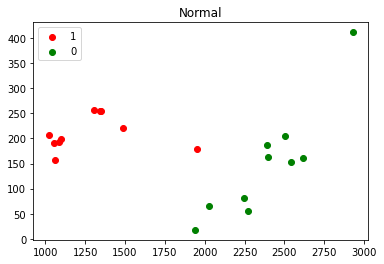

In [164]:
plotDescriptors(zeros_im_bin_op, ones_im_bin_op, 'Normal', 0)

### Part B - Rotation, Translation and Scaling 


In [165]:
### Rotation
from skimage.transform import rotate

def imageRotation(image, degree):
    im_rot = rotate(image, degree, resize=True)
    
    return im_rot   

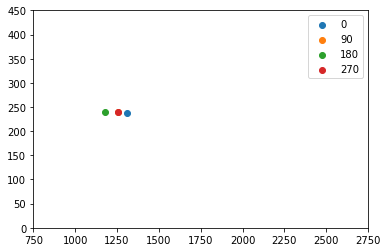

In [188]:
descriptors= []
degrees = [0, 90, 180, 270]

for deg in degrees:
    val = findImageDescriptor(findContour(imageRotation(ones_im_bin[0],deg)))
    descriptors.append(val)
    plt.scatter(val[0], val[1], label = deg)
    plt.yticks(np.arange(0, 500, 50))
    plt.xticks(np.arange(750, 3000, 250))
    plt.legend()
descriptors= np.array(descriptors)

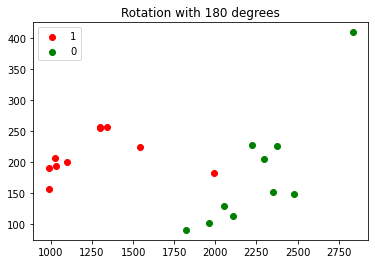

In [180]:
plotDescriptors(zeros_im_bin_op, ones_im_bin_op, 'Rotation', 180)

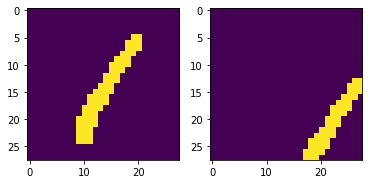

In [167]:
### Translation
# Translation - we take the first ones and shift it around in the image

def imageTranslation(image,x,y):
    
    N = len(image)
    new_im = np.zeros(image.shape)
    
    for i in range(N):
        for j in range(N):
            if i+x<N and 0<i+x and j+y<N and 0<j+y:
                new_im[i][j] = image[i+x][j+y]

    return new_im


fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(ones_im_bin[0])
ax2.imshow(imageTranslation(ones_im_bin[0],-8,-7))

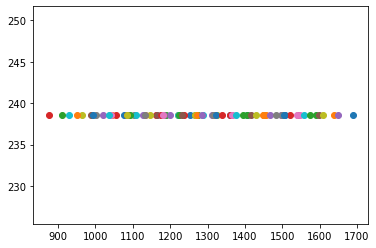

In [168]:
descriptors= []

for x in range(-2,4):
    for y in range(-6,8):
        #print(x,y)
        val = findImageDescriptor(findContour(imageTranslation(ones_im_bin[0],x,y)))
        descriptors.append(val)
        plt.scatter(val[0], val[1], label = f'{x,y}')
descriptors= np.array(descriptors)

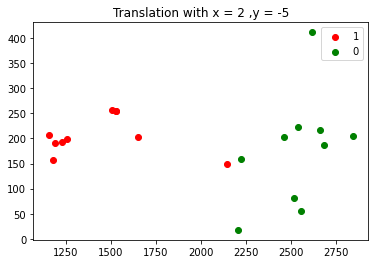

In [173]:
plotDescriptors(zeros_im_bin_op, ones_im_bin_op, 'Translation', [2, -5])

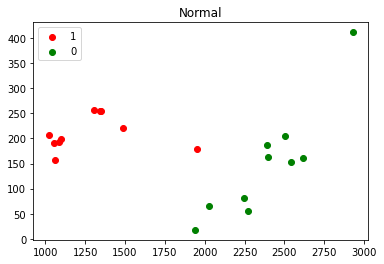

In [175]:
plotDescriptors(zeros_im_bin_op, ones_im_bin_op, 'Normal')

In [ ]:
### Scaling

### 1.3 Additional method (5 pts)

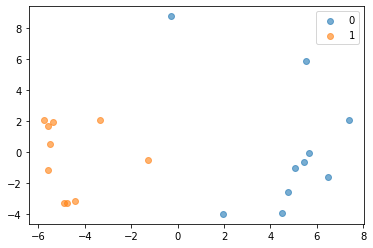

In [131]:
# Add your implementation and discussion
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
X=np.concatenate((zeros_im_bin_op,ones_im_bin_op),axis=0)
X=X.reshape((20, -1))
X_reduced_pca = PCA(n_components=2).fit(X).transform(X)
plt.scatter(X_reduced_pca[0:10,0], X_reduced_pca[0:10,1], label=0, alpha=0.6)
plt.scatter(X_reduced_pca[10:,0], X_reduced_pca[10:,1], label=1, alpha=0.6)
plt.legend()

---
## Part 2
The `lab-02-data/part2` folder contains grey-scale pictures of handwritten "2" and "3".
Extract the same feature (typically 2 Fourier descriptors) as in part 1 also on these images and plot them on the same graph as the features of the "0" and "1".
Is it possible to discriminate all these 4 digits with a 2-dimensional feature vector?

### 2.1 Data visualization

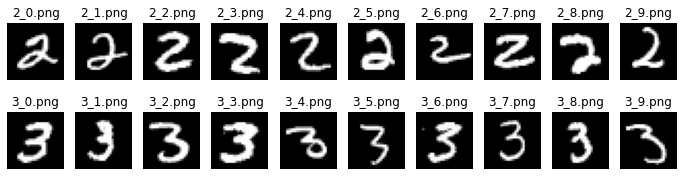

In [18]:
#  Load twos and threes
twos_im, twos_names = load(data_part2, digit='2')
threes_im, threes_names = load(data_part2, digit='3')

# Plot images
fig, axes = plt.subplots(2, len(twos_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

### 2.2 Fourier descriptors - 4 digits (10 pts)

In [19]:
# Add your implementation and discussion